In [1]:
%pylab inline
import calcium_spikes as cs
import numpy as np
import matplotlib.pyplot as plt

/Users/Torben/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/Users/Torben/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_dir = '/Users/Torben/Documents/cai-3_dataset/data/'
all_dat = cs.data_organization.load_data(data_dir)

all_calcium = all_dat[0]
all_spikes = all_dat[1]
all_loc= all_dat[2]
all_bs = all_dat[3]
all_ind = all_dat[4]

22 cells loaded


In [3]:
complete_feature_mat = cs.data_organization.build_feature_mat(all_calcium, all_loc, all_ind, all_bs)
X_train,X_test,y_train,y_test = cs.data_organization.build_train_test_sets(complete_feature_mat,all_spikes, ceil_spikes=True, subsample=10000, test_size=.2)

In [4]:
print X_test.shape

(2000, 58)


In [5]:
Yr,Yt,model = cs.boosting.binary_booster(X_train,X_test,y_train,y_test)

In [6]:
train_metrics, test_metrics, [train_scores, test_scores] = cs.output_analysis.calculate_accuracy_metrics(y_train,y_test, Yr, Yt)

Train correlation: 0.996
Test correlation: 0.051
Training Accuracy:
0 spikes: 7756 True Positive (1.0%). 2 False Positive (0.0082%). 7756 True Negative (0.9695%). 0 False Negative (0.0%). 7756 Total. 
1 spikes: 242 True Positive (0.9918%). 0 False Positive (0.0%). 7756 True Negative (0.9695%). 0 False Negative (0.0%). 244 Total. 
Testing Accuracy:
0 spikes: 1921 True Positive (0.9938%). 65 False Positive (0.9701%). 1921 True Negative (0.9605%). 12 False Negative (0.1791%). 1933 Total. 
1 spikes: 2 True Positive (0.0299%). 12 False Positive (0.0062%). 1921 True Negative (0.9605%). 12 False Negative (0.0062%). 67 Total. 


In [7]:
train_measures,test_measures = cs.output_analysis.calculate_all_accuracy(y_train, y_test, Yr, Yt);


/Users/Torben/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/Torben/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


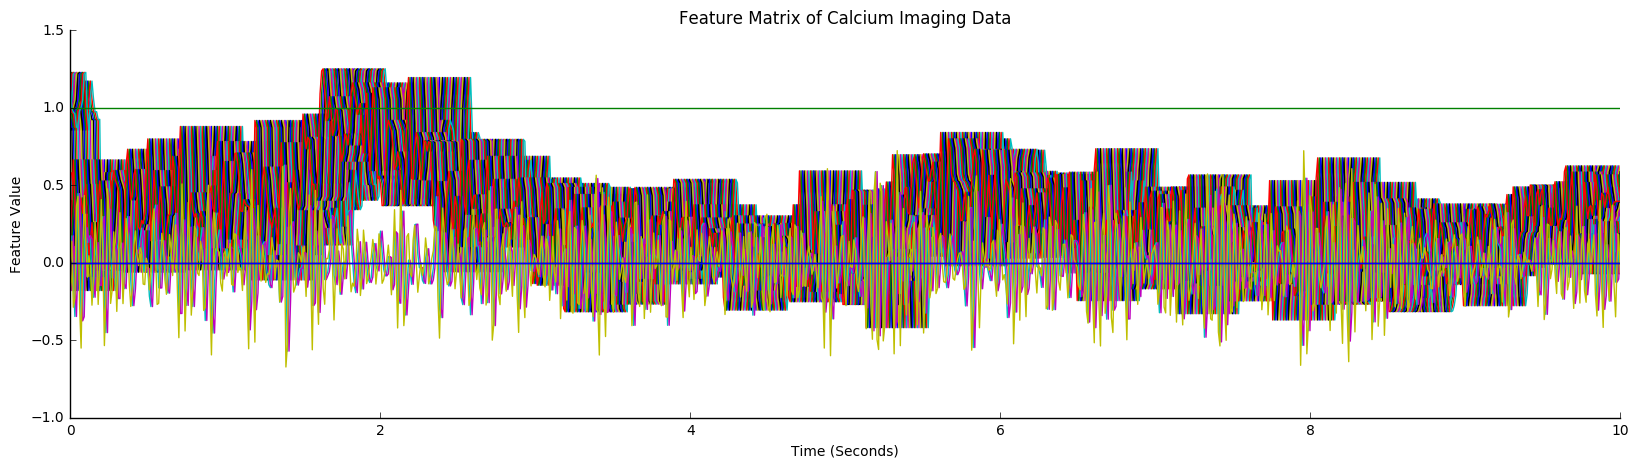

In [8]:
cs.plotting_functions.plot_feature_mat(complete_feature_mat);

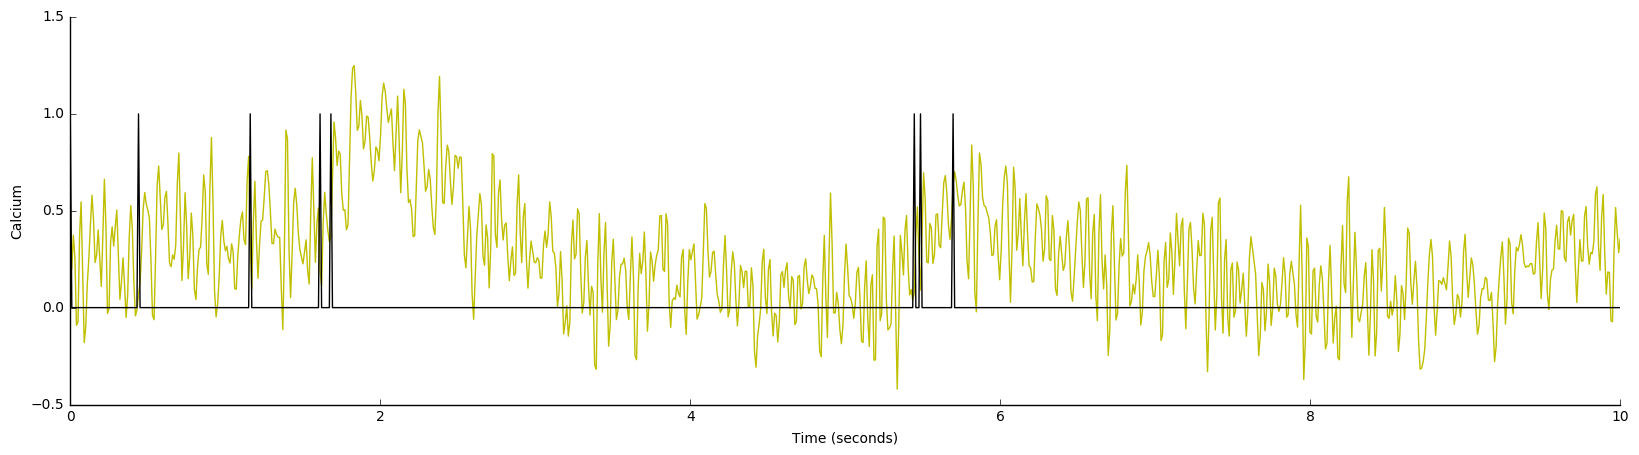

In [10]:
cs.plotting_functions.plot_dat_seg(all_calcium,spikes=all_spikes);

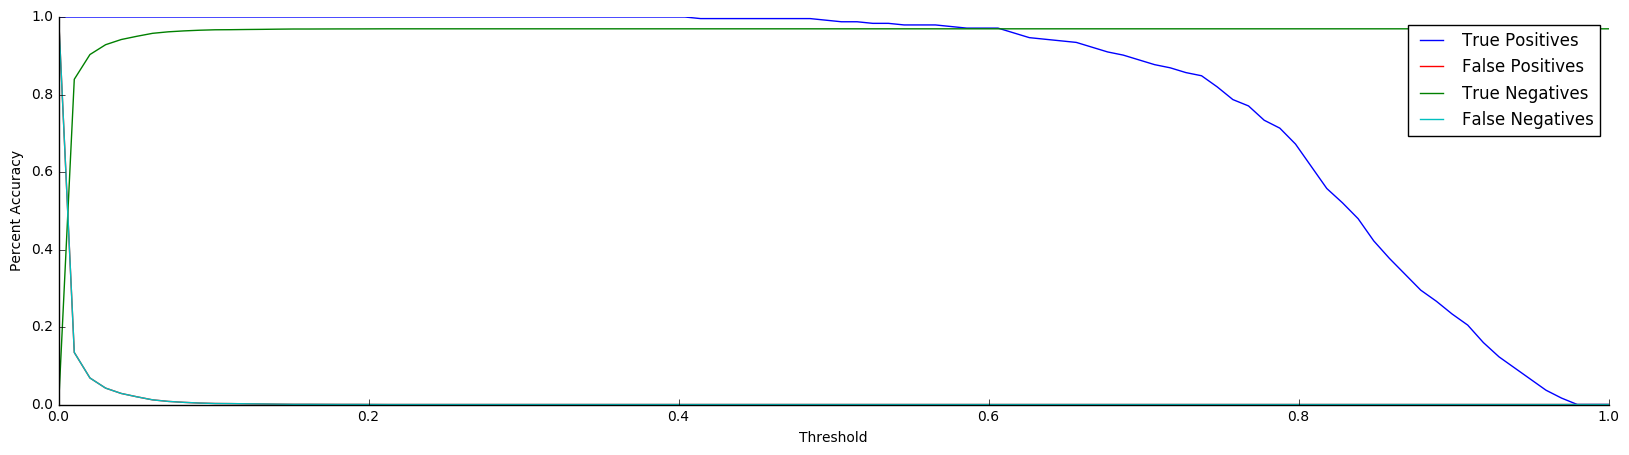

In [12]:
cs.plotting_functions.plot_all_accuracies(train_measures);